In [1]:
file = r"/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/allBrandsInformation.csv"
df = spark.read.csv(file, header=True, inferSchema=True)
df = df.withColumnRenamed('品牌', 'Brand').withColumnRenamed('4s店数', 'Car4SShop').withColumnRenamed('车型', 'CarType').withColumnRenamed('报价(单位：万)', 'Price')
df.show()
df.printSchema()
df.count()

+-----+---------+--------------+-------------+
|Brand|Car4SShop|       CarType|        Price|
+-----+---------+--------------+-------------+
| 奥迪|      607|       奥迪A4L|  30.58-39.68|
| 奥迪|      607|       奥迪A6L|  41.98-65.38|
| 奥迪|      607|       奥迪Q5L|  38.78-49.80|
| 奥迪|      607|        奥迪Q3|  27.18-36.18|
| 奥迪|      607|        奥迪A3|  19.32-26.85|
| 奥迪|      607|        奥迪Q7|  68.88-86.68|
| 奥迪|      607|       奥迪Q2L|  21.88-26.85|
| 奥迪|      607|        奥迪A8| 84.28-194.28|
| 奥迪|      607|        奥迪A5|  37.18-56.38|
| 奥迪|      607|        奥迪Q8| 76.88-104.88|
| 奥迪|      607|        奥迪A7|  57.38-70.48|
| 奥迪|      607|  奥迪A6(进口)|  44.98-56.98|
| 奥迪|      607|        奥迪S4|  45.98-46.88|
| 奥迪|      607|  奥迪A4(进口)|  34.18-42.78|
| 奥迪|      607|        奥迪TT|  45.38-53.28|
| 奥迪|      607|        奥迪R8|195.28-275.34|
| 奥迪|      607|        奥迪S5|  61.98-70.88|
| 奥迪|      607|      奥迪RS 7|144.88-172.23|
| 奥迪|      607|        奥迪S3|  36.38-36.38|
| 奥迪|      607|奥迪Q2L e-tron|  22.68-23.73|
+--

2431

In [2]:
# 数据清理，将”暂无报价“的车型全部删除
cleanDf = df.filter(df['Price'] != '暂无报价')
cleanDf.count()
cleanDf.show()

+-----+---------+--------------+-------------+
|Brand|Car4SShop|       CarType|        Price|
+-----+---------+--------------+-------------+
| 奥迪|      607|       奥迪A4L|  30.58-39.68|
| 奥迪|      607|       奥迪A6L|  41.98-65.38|
| 奥迪|      607|       奥迪Q5L|  38.78-49.80|
| 奥迪|      607|        奥迪Q3|  27.18-36.18|
| 奥迪|      607|        奥迪A3|  19.32-26.85|
| 奥迪|      607|        奥迪Q7|  68.88-86.68|
| 奥迪|      607|       奥迪Q2L|  21.88-26.85|
| 奥迪|      607|        奥迪A8| 84.28-194.28|
| 奥迪|      607|        奥迪A5|  37.18-56.38|
| 奥迪|      607|        奥迪Q8| 76.88-104.88|
| 奥迪|      607|        奥迪A7|  57.38-70.48|
| 奥迪|      607|  奥迪A6(进口)|  44.98-56.98|
| 奥迪|      607|        奥迪S4|  45.98-46.88|
| 奥迪|      607|  奥迪A4(进口)|  34.18-42.78|
| 奥迪|      607|        奥迪TT|  45.38-53.28|
| 奥迪|      607|        奥迪R8|195.28-275.34|
| 奥迪|      607|        奥迪S5|  61.98-70.88|
| 奥迪|      607|      奥迪RS 7|144.88-172.23|
| 奥迪|      607|        奥迪S3|  36.38-36.38|
| 奥迪|      607|奥迪Q2L e-tron|  22.68-23.73|
+--

In [3]:
cleanDf.createOrReplaceTempView('TableA')
#按照每个品牌在中国销售的车型的数量排序，由多到少
wordCloudDf = spark.sql("SELECT Brand,COUNT(DISTINCT CarType) AS countOfBrand FROM TableA\
                        GROUP BY Brand ORDER BY countOfBrand DESC")

wordCloudList = [row.Brand for row in wordCloudDf.collect()]
countOfBrandList = [row.countOfBrand for row in wordCloudDf.collect()]

dataList = []
for i in range(len(wordCloudList)):
    tempData = (wordCloudList[i], countOfBrandList[i],)
    dataList.append(tempData)

print(len(wordCloudList))
print(dataList)


191
[('奔驰', 69), ('大众', 51), ('宝马', 49), ('丰田', 45), ('奥迪', 42), ('福特', 29), ('江淮', 28), ('比亚迪', 26), ('现代', 26), ('长安', 25), ('福田', 25), ('日产', 24), ('金杯', 24), ('吉利', 23), ('路虎', 22), ('雪佛兰', 21), ('长安欧尚', 20), ('起亚', 20), ('东风风行', 19), ('奇瑞', 18), ('五菱汽车', 18), ('雷克萨斯', 17), ('本田', 17), ('东风小康', 17), ('上汽MAXUS', 16), ('长安凯程', 16), ('林肯', 16), ('保时捷', 16), ('别克', 16), ('沃尔沃', 15), ('荣威', 14), ('东风', 14), ('江铃', 14), ('哈弗', 14), ('BEIJING汽车', 12), ('玛莎拉蒂', 12), ('雪铁龙', 11), ('东风风光', 11), ('SRM鑫源', 11), ('广汽传祺', 11), ('一汽', 11), ('启辰', 11), ('凯迪拉克', 11), ('东风风神', 10), ('Jeep', 10), ('英菲尼迪', 10), ('名爵', 10), ('长安跨越', 10), ('宾利', 10), ('标致', 10), ('北汽昌河', 9), ('宝骏', 9), ('开瑞', 9), ('捷豹', 9), ('奔腾', 9), ('捷途', 8), ('迈凯伦', 8), ('海格', 8), ('领克', 8), ('红旗', 8), ('斯柯达', 8), ('黄海', 8), ('GMC', 8), ('海马', 8), ('北汽制造', 7), ('北汽新能源', 7), ('马自达', 7), ('三菱', 7), ('阿斯顿·马丁', 7), ('WEY', 7), ('法拉利', 7), ('力帆汽车', 7), ('双龙', 7), ('野马汽车', 6), ('成功汽车', 6), ('众泰', 6), ('MINI', 6), ('新宝骏', 6), ('福汽启腾', 6), 

In [4]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud

In [5]:
#中国在售汽车品牌词云统计
def wordCloud():
    wordCloud = WordCloud()\
    .add(series_name="中国在售汽车品牌", data_pair=dataList, word_size_range=[6, 66])\
    .set_global_opts(title_opts=opts.TitleOpts(title="中国在售汽车品牌",title_textstyle_opts=opts.TextStyleOpts(font_size=23)),\
                     tooltip_opts=opts.TooltipOpts(is_show=True),)
    return wordCloud

In [6]:
#品牌销售车型数量排行，降序
brandCarTypeDf = spark.sql("SELECT Brand,COUNT(DISTINCT CarType) AS countOfBrand FROM TableA\
                        GROUP BY Brand ORDER BY countOfBrand DESC LIMIT 30")

brandList = [row.Brand for row in brandCarTypeDf.collect()]
carTypeList = [row.countOfBrand for row in brandCarTypeDf.collect()]

print(brandList)
print(carTypeList)

['奔驰', '大众', '宝马', '丰田', '奥迪', '福特', '江淮', '比亚迪', '现代', '长安', '福田', '日产', '金杯', '吉利', '路虎', '雪佛兰', '起亚', '长安欧尚', '东风风行', '奇瑞', '五菱汽车', '东风小康', '本田', '雷克萨斯', '别克', '长安凯程', '保时捷', '上汽MAXUS', '林肯', '沃尔沃']
[69, 51, 49, 45, 42, 29, 28, 26, 26, 25, 25, 24, 24, 23, 22, 21, 20, 20, 19, 18, 18, 17, 17, 17, 16, 16, 16, 16, 16, 15]


In [7]:
from pyecharts.charts import Bar

In [8]:
def brandCarSaleRank():
    bar = Bar()\
    .add_xaxis(brandList)\
    .add_yaxis("车型数量", carTypeList)\
    .set_global_opts(title_opts=opts.TitleOpts(title="品牌销售车型数量排行"),\
                     datazoom_opts=opts.DataZoomOpts(range_start=0, range_end=45),\
                     toolbox_opts=opts.ToolboxOpts(),\
                     yaxis_opts=opts.AxisOpts(name="车型数量"),\
                     xaxis_opts=opts.AxisOpts(name = "品牌名称", axislabel_opts=opts.LabelOpts(rotate=50, interval=0)))
    return bar

In [9]:
import operator
import random
import csv
import os

#每个品牌的整体价格分布

brandPriceDf = spark.sql("SELECT * FROM TableA")

allBrandList = [row.Brand for row in brandPriceDf.collect()]
priceList = [row.Price for row in brandPriceDf.collect()]

smallBrandList1 = []
smallBrandList1.append(allBrandList[0])
for x in range(1, len(allBrandList)):
    
    if operator.ne(allBrandList[x], allBrandList[x-1]) and operator.eq(allBrandList[x], allBrandList[x+1]):
        smallBrandList1.append(allBrandList[x])
    elif operator.ne(allBrandList[x], allBrandList[x-1]) and operator.ne(allBrandList[x], allBrandList[x+1]):
        smallBrandList1.append(allBrandList[x])

print(smallBrandList1)
priceData = []

if os.path.exists('/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/price.csv'):
        os.remove('/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/price.csv')

def save_columns_to_csv(columns, encoding='utf-8'):

    with open('/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/price.csv', 'a', encoding=encoding) as csvfile:
        csv_write = csv.writer(csvfile)
        csv_write.writerow(columns)

for i in range(1, len(allBrandList)):
    if operator.eq(allBrandList[i], allBrandList[i-1]):
        priceData.append(priceList[i])
    elif operator.ne(allBrandList[i], allBrandList[i-1]) and operator.eq(allBrandList[i], allBrandList[i+1]):
        save_columns_to_csv(priceData)
        priceData.clear()
        priceData.append(priceList[i])
    elif operator.ne(allBrandList[i], allBrandList[i-1]) and operator.ne(allBrandList[i], allBrandList[i+1]):
        save_columns_to_csv(priceData)
        priceData.clear()
        priceData.append(priceList[i])
save_columns_to_csv(priceData)

['奥迪', '阿斯顿·马丁', '阿尔法·罗密欧', '爱驰', 'ARCFOX', 'ALPINA', '别克', '宝马', '奔驰', '本田', '比亚迪', '宝骏', '保时捷', '标致', '奔腾', 'BEIJING汽车', '北京', '北汽新能源', '宾利', '北汽昌河', '北汽制造', '宝沃', '北汽幻速', '北汽威旺', '比速汽车', '布加迪', '巴博斯', '铂驰', '北汽道达', '长安', '长安欧尚', '长城', '长安凯程', '长安跨越', '成功汽车', '车质尚', '大众', '东风风行', '东风风光', '东风风神', '东南', '东风小康', '东风', '道奇', 'DS', '东风风度', '大乘汽车', '大运汽车', '东风富康', '丰田', '福特', '福田', '法拉利', '菲亚特', '福迪', '枫叶汽车', '福汽启腾', '飞碟汽车', '广汽传祺', '观致', '广汽埃安', '广汽集团', 'GMC', '广汽吉奥', '国机智骏', '高合汽车', '国金汽车', '哈弗', '红旗', '海马', '汉腾汽车', '黄海', '华泰', '汉龙汽车', 'HYCAN合创', '海格', '恒天', '吉利', '捷途', 'Jeep', '江淮', '捷达', '捷豹', '金杯', '江铃', '几何汽车', '江铃集团新能源', '九龙', '金龙', '金旅', '钧天汽车', '凯迪拉克', '开瑞', '凯翼', '克莱斯勒', '科尼赛克', 'KTM', '开沃汽车', '凯伦宾威', '卡威', '领克', '雷克萨斯', '林肯', '路虎', '铃木', '劳斯莱斯', '陆风', '零跑汽车', '兰博基尼', '猎豹汽车', '理想', '雷诺', '力帆汽车', '理念', '凌宝汽车', 'Lorinser', '雷丁', '路特斯', '领途汽车', '罗夫哈特', '马自达', '名爵', 'MINI', '玛莎拉蒂', '迈凯伦', '迈巴赫', '摩根', 'Mansory', '明君汽车', '哪吒汽车', 'NEVS国能汽车', '欧拉', '讴歌', '帕加尼', 'Polestar', '奇瑞', '起亚', '

In [10]:
with open('/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/price.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    rows= [row for row in reader]
print(rows)

[['41.98-65.38', '38.78-49.80', '27.18-36.18', '19.32-26.85', '68.88-86.68', '21.88-26.85', '84.28-194.28', '37.18-56.38', '76.88-104.88', '57.38-70.48', '44.98-56.98', '45.98-46.88', '34.18-42.78', '45.38-53.28', '195.28-275.34', '61.98-70.88', '144.88-172.23', '36.38-36.38', '22.68-23.73', '83.68-86.98', '81.28-82.28', '18.98-21.85', '100.98-100.98', '92.98-92.98', '69.28-82.86', '50.80-50.80', '135.78-177.39', '58.80-61.80', '69.00-83.50', '56.80-75.00', '76.98-76.98', '51.38-51.38', '75.00-79.00', '33.58-33.58', '59.78-63.48', '53.00-62.00', '79.08-79.08', '100.00-150.00', '42.80-42.80', '100.00-110.00', '39.98-39.98'], ['220.80-298.80', '212.80-319.80', '181.80-259.80', '366.80-500.70', '289.80-309.80', '341.80-373.80', '279.80-286.80'], ['37.98-125.98', '45.68-127.98'], ['16.69-29.21'], ['24.19-31.99'], ['109.80-109.80'], ['23.29-52.99', '11.99-12.59', '18.99-27.99', '27.99-37.99', '17.28-25.98', '21.98-28.98', '21.99-27.99', '12.59-15.59', '13.99-16.99', '15.98-19.98', '15.29-18

In [11]:
accomplishPriceList = []
for i in range(len(rows)):
    tempPriceList = rows[i]
    completePriceList = []
    for j in range(len(tempPriceList)):
        smallList = tempPriceList[j].split('-', 1)
        if len(smallList) >= 2:
            completeList = int((float(smallList[0])+float(smallList[1]))/2)
            completePriceList.append(completeList)
        else:
            completePriceList.append(smallList[0])
    accomplishPriceList.append(completePriceList)
    print(completePriceList)
print(len(accomplishPriceList))

[53, 44, 31, 23, 77, 24, 139, 46, 90, 63, 50, 46, 38, 49, 235, 66, 158, 36, 23, 85, 81, 20, 100, 92, 76, 50, 156, 60, 76, 65, 76, 51, 77, 33, 61, 57, 79, 125, 42, 105, 39]
[259, 266, 220, 433, 299, 357, 283]
[81, 86]
[22]
[28]
[109]
[38, 12, 23, 32, 21, 25, 24, 14, 15, 17, 16, 9, 17, 13, 18, 57]
[48, 78, 35, 43, 30, 162, 139, 29, 23, 48, 51, 85, 52, 39, 63, 226, 30, 107, 111, 145, 56, 51, 63, 33, 97, 58, 86, 39, 75, 80, 28, 143, 48, 30, 179, 32, 124, 128, 89, 85, 86, 146, 134, 83, 111, 68, 69, 97, 87]
[49, 39, 53, 32, 102, 133, 116, 25, 31, 56, 28, 30, 166, 229, 34, 68, 40, 56, 164, 27, 52, 88, 48, 63, 267, 97, 113, 56, 234, 40, 100, 56, 122, 51, 268, 171, 64, 94, 51, 87, 50, 293, 137, 43, 84, 179, 223, 165, 63, 344, 1024, 428, 258, 298, 52, 85, 85, 115, 246, 169, 348, 160, 48, 58, 118, 75, 140, 175, 263]
[21, 27, 22, 14, 30, 21, 15, 15, 9, 28, 13, 28, 13, 21, 22, 10, 28]
[10, 12, 10, 11, 25, 4, 24, 9, 14, 17, 8, 17, 11, 19, 6, 16, 4, 11, 7, 13, 22, 9, 12, 8, 12, 16]
[9, 6, 8, 6, 4, 5,

In [12]:
def bubbleSort(arr):
    n = len(arr)
 
    # 遍历所有数组元素
    for i in range(n):
 
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            if float(arr[j]) > float(arr[j+1]) :
                arr[j], arr[j+1] = float(arr[j+1]), float(arr[j])
            
    minArr = arr[0]
    maxArr = arr[n-1]
    
    totalArr = 0
    for x in range(n):
        totalArr += float(arr[x])
    
    averageArr = int(totalArr/n)
    rangeArr = float(arr[n-1])-float(arr[0])
    
    newPriceList = [minArr, maxArr, averageArr, rangeArr]
    return newPriceList

minPriceList = []
maxPriceList = []
averagePriceList = []
rangePriceList = []

for i in range(len(accomplishPriceList)):
    arr = accomplishPriceList[i]
    newPriceList1 = bubbleSort(arr)

    minPriceList.append(newPriceList1[0])
    maxPriceList.append(newPriceList1[1])
    averagePriceList.append(newPriceList1[2])
    rangePriceList.append(newPriceList1[3])

print(minPriceList)
print(maxPriceList)
print(averagePriceList)
print(rangePriceList)

[20.0, 220.0, 81, 22, 28, 109, 9.0, 23.0, 25.0, 9.0, 4.0, 4.0, 73.0, 9.0, 8.0, 7.0, 11.0, 5, 229.0, 3.0, 6.0, 11.0, 3.0, 3.0, 8, 5788, 25, 66.0, 13, 4.0, 4.0, 9.0, 3.0, 3.0, 3, 45, 9.0, 6.0, 4.0, 7.0, 6.0, 3.0, 4.0, 32.0, 27, 11, 7.0, 7, 13, 8.0, 9.0, 3.0, 238.0, 23, 7.0, 8, 3.0, 11, 9.0, 12, 16.0, 13.0, 69.0, 2, 7, 74, 23, 7.0, 16.0, 8.0, 6.0, 7.0, 11, 20, 32, 8.0, 6, 4.0, 8.0, 16.0, 3.0, 7.0, 33.0, 2.0, 8.0, 15, 5, 9.0, 8, 8, 97, 24.0, 3.0, 6, 44.0, 2635.0, 139, 8.0, 58, 8, 13.0, 24.0, 29, 40.0, 4.0, 570.0, 7.0, 6, 292.0, 9.0, 32, 6.0, 2.0, 17, 3, 88.0, 5, 82.0, 19, 95, 15, 8.0, 28, 85.0, 198.0, 1180, 88.0, 158.0, 8, 9, 16, 7, 28.0, 2900, 37.0, 5.0, 6.0, 7.0, 6, 168.0, 15.0, 7.0, 5.0, 18, 5.0, 350, 8.0, 12.0, 11.0, 21.0, 9, 6.0, 15.0, 15.0, 29, 3.0, 16, 15, 34, 31.0, 29, 17, 32.0, 3.0, 13.0, 44, 10.0, 17, 4.0, 21, 6.0, 7.0, 9.0, 7.0, 13, 17, 15, 135, 29.0, 14.0, 2.0, 11.0, 6, 27, 11.0, 10.0, 43, 10, 4.0, 6.0, 6.0]
[235.0, 433.0, 86, 22, 28, 109, 57, 226.0, 1024.0, 30.0, 25.0, 9.0, 24

In [13]:
from pyecharts.charts import Line, Scatter, Page
from pyecharts.components import Table
print(smallBrandList1)

['奥迪', '阿斯顿·马丁', '阿尔法·罗密欧', '爱驰', 'ARCFOX', 'ALPINA', '别克', '宝马', '奔驰', '本田', '比亚迪', '宝骏', '保时捷', '标致', '奔腾', 'BEIJING汽车', '北京', '北汽新能源', '宾利', '北汽昌河', '北汽制造', '宝沃', '北汽幻速', '北汽威旺', '比速汽车', '布加迪', '巴博斯', '铂驰', '北汽道达', '长安', '长安欧尚', '长城', '长安凯程', '长安跨越', '成功汽车', '车质尚', '大众', '东风风行', '东风风光', '东风风神', '东南', '东风小康', '东风', '道奇', 'DS', '东风风度', '大乘汽车', '大运汽车', '东风富康', '丰田', '福特', '福田', '法拉利', '菲亚特', '福迪', '枫叶汽车', '福汽启腾', '飞碟汽车', '广汽传祺', '观致', '广汽埃安', '广汽集团', 'GMC', '广汽吉奥', '国机智骏', '高合汽车', '国金汽车', '哈弗', '红旗', '海马', '汉腾汽车', '黄海', '华泰', '汉龙汽车', 'HYCAN合创', '海格', '恒天', '吉利', '捷途', 'Jeep', '江淮', '捷达', '捷豹', '金杯', '江铃', '几何汽车', '江铃集团新能源', '九龙', '金龙', '金旅', '钧天汽车', '凯迪拉克', '开瑞', '凯翼', '克莱斯勒', '科尼赛克', 'KTM', '开沃汽车', '凯伦宾威', '卡威', '领克', '雷克萨斯', '林肯', '路虎', '铃木', '劳斯莱斯', '陆风', '零跑汽车', '兰博基尼', '猎豹汽车', '理想', '雷诺', '力帆汽车', '理念', '凌宝汽车', 'Lorinser', '雷丁', '路特斯', '领途汽车', '罗夫哈特', '马自达', '名爵', 'MINI', '玛莎拉蒂', '迈凯伦', '迈巴赫', '摩根', 'Mansory', '明君汽车', '哪吒汽车', 'NEVS国能汽车', '欧拉', '讴歌', '帕加尼', 'Polestar', '奇瑞', '起亚', '

In [14]:
def scatter_point():
    scatter = Scatter()\
    .add_xaxis(smallBrandList1)\
    .add_yaxis("最高价格", maxPriceList)\
    .add_yaxis("最低价格", minPriceList)\
    .add_yaxis("平均价格", averagePriceList)\
    .set_global_opts(title_opts=opts.TitleOpts(title="汽车品牌价格分布"),\
                     datazoom_opts=opts.DataZoomOpts(range_start=18, range_end=27),\
                     visualmap_opts=opts.VisualMapOpts(type_="size", max_=600, min_=0),\
                     yaxis_opts=opts.AxisOpts(name="价格"),\
                     xaxis_opts=opts.AxisOpts(name = "品牌名称", axislabel_opts=opts.LabelOpts(rotate=50, interval=0)))
    return scatter

In [15]:
def line_point():
    line = Line()\
    .add_xaxis(smallBrandList1)\
    .add_yaxis("价格极差", rangePriceList)\
    .set_global_opts(title_opts=opts.TitleOpts(title="汽车品牌价格极差"),\
                    datazoom_opts=opts.DataZoomOpts(range_start=18, range_end=27),\
                    yaxis_opts=opts.AxisOpts(name="价格"),\
                    xaxis_opts=opts.AxisOpts(name = "品牌名称", axislabel_opts=opts.LabelOpts(rotate=50, interval=0)))
    
    return line

In [16]:
cleanDf.show()

+-----+---------+--------------+-------------+
|Brand|Car4SShop|       CarType|        Price|
+-----+---------+--------------+-------------+
| 奥迪|      607|       奥迪A4L|  30.58-39.68|
| 奥迪|      607|       奥迪A6L|  41.98-65.38|
| 奥迪|      607|       奥迪Q5L|  38.78-49.80|
| 奥迪|      607|        奥迪Q3|  27.18-36.18|
| 奥迪|      607|        奥迪A3|  19.32-26.85|
| 奥迪|      607|        奥迪Q7|  68.88-86.68|
| 奥迪|      607|       奥迪Q2L|  21.88-26.85|
| 奥迪|      607|        奥迪A8| 84.28-194.28|
| 奥迪|      607|        奥迪A5|  37.18-56.38|
| 奥迪|      607|        奥迪Q8| 76.88-104.88|
| 奥迪|      607|        奥迪A7|  57.38-70.48|
| 奥迪|      607|  奥迪A6(进口)|  44.98-56.98|
| 奥迪|      607|        奥迪S4|  45.98-46.88|
| 奥迪|      607|  奥迪A4(进口)|  34.18-42.78|
| 奥迪|      607|        奥迪TT|  45.38-53.28|
| 奥迪|      607|        奥迪R8|195.28-275.34|
| 奥迪|      607|        奥迪S5|  61.98-70.88|
| 奥迪|      607|      奥迪RS 7|144.88-172.23|
| 奥迪|      607|        奥迪S3|  36.38-36.38|
| 奥迪|      607|奥迪Q2L e-tron|  22.68-23.73|
+--

In [17]:
cleanDf.createOrReplaceTempView('TableA')

# car4SShopDf = spark.sql("SELECT Car4SShop, COUNT(DISTINCT CarType) AS countOf4SShop FROM TableA\
#                         GROUP BY Car4SShop ORDER BY Car4SShop DESC")
car4SShopDf1 = spark.sql("select Brand, Car4SShop from TableA order by Car4SShop DESC")

car4SShopList = [row.Car4SShop for row in car4SShopDf1.collect()]
carBrandList = [row.Brand for row in car4SShopDf1.collect()]

smallBrandList = []
smallBrandList.append(carBrandList[0])
smallPriceList = []
smallPriceList.append(car4SShopList[0])
for x in range(1, len(carBrandList)-1):  
    if operator.ne(carBrandList[x], carBrandList[x-1]) and operator.eq(carBrandList[x], carBrandList[x+1]):
        smallBrandList.append(carBrandList[x])
        smallPriceList.append(car4SShopList[x])
    elif operator.ne(carBrandList[x], carBrandList[x-1]) and operator.ne(carBrandList[x], carBrandList[x+1]):
        smallBrandList.append(carBrandList[x])
        smallPriceList.append(car4SShopList[x])
smallBrandList.append(carBrandList[len(carBrandList)-1])
smallPriceList.append(car4SShopList[len(car4SShopList)-1])

print(len(smallBrandList))
print(len(smallPriceList))


191
191


In [18]:
from pyecharts.charts import Bar

In [19]:
def carBrand4SNumber():
    bar = Bar()\
    .add_xaxis(smallBrandList)\
    .add_yaxis("4S店数", smallPriceList)\
    .set_global_opts(title_opts=opts.TitleOpts(title="各汽车品牌在华4S店数"),\
                     datazoom_opts=opts.DataZoomOpts(range_start=0, range_end=10),\
                     toolbox_opts=opts.ToolboxOpts(),\
                     yaxis_opts=opts.AxisOpts(name="4S店数"),\
                     xaxis_opts=opts.AxisOpts(name = "品牌名称", axislabel_opts=opts.LabelOpts(rotate=50, interval=0)))
    return bar

In [20]:
file = r"/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/carPriceLevel.csv"
df = spark.read.csv(file, header=True, inferSchema=True)
df = df.withColumnRenamed('价格区间', 'priceLevel').withColumnRenamed('车型', 'CarType').withColumnRenamed('报价(单位：万)', 'Price')
df.show()
df.printSchema()
df.count()

+----------+------------+----------------+
|priceLevel|     CarType|           Price|
+----------+------------+----------------+
|   5万以下|        瑞纳|('4.99', '7.39')|
|   5万以下|     艾瑞泽5|('4.99', '8.58')|
|   5万以下|      远景X3|('4.99', '6.89')|
|   5万以下|      瑞虎3X|('4.69', '6.79')|
|   5万以下|    五菱宏光|('4.28', '5.88')|
|   5万以下|    比亚迪F3|('4.49', '5.08')|
|   5万以下|        远景|('4.99', '7.39')|
|   5万以下|        悦翔|('4.99', '6.79')|
|   5万以下|        嘉际|        暂无报价|
|   5万以下|    宝骏310W|('4.28', '7.28')|
|   5万以下|     宝骏310|('3.68', '6.08')|
|   5万以下|五菱荣光新卡|('4.58', '6.28')|
|   5万以下|     东南DX3|        暂无报价|
|   5万以下| 长安神骐T20|('3.59', '6.38')|
|   5万以下|  奔奔E-Star|('2.98', '7.48')|
|   5万以下|    长安星卡|('3.49', '4.94')|
|   5万以下|五菱荣光小卡|('3.56', '4.88')|
|   5万以下|        悦纳|        暂无报价|
|   5万以下|   五菱宏光S|('4.28', '5.58')|
|   5万以下|    五菱荣光|('3.68', '5.38')|
+----------+------------+----------------+
only showing top 20 rows

root
 |-- priceLevel: string (nullable = true)
 |-- CarType: string (nulla

2035

In [21]:
cleanDf = df.filter(df['Price'] != '暂无报价')
cleanDf.count()
cleanDf.show()

+----------+------------+----------------+
|priceLevel|     CarType|           Price|
+----------+------------+----------------+
|   5万以下|        瑞纳|('4.99', '7.39')|
|   5万以下|     艾瑞泽5|('4.99', '8.58')|
|   5万以下|      远景X3|('4.99', '6.89')|
|   5万以下|      瑞虎3X|('4.69', '6.79')|
|   5万以下|    五菱宏光|('4.28', '5.88')|
|   5万以下|    比亚迪F3|('4.49', '5.08')|
|   5万以下|        远景|('4.99', '7.39')|
|   5万以下|        悦翔|('4.99', '6.79')|
|   5万以下|    宝骏310W|('4.28', '7.28')|
|   5万以下|     宝骏310|('3.68', '6.08')|
|   5万以下|五菱荣光新卡|('4.58', '6.28')|
|   5万以下| 长安神骐T20|('3.59', '6.38')|
|   5万以下|  奔奔E-Star|('2.98', '7.48')|
|   5万以下|    长安星卡|('3.49', '4.94')|
|   5万以下|五菱荣光小卡|('3.56', '4.88')|
|   5万以下|   五菱宏光S|('4.28', '5.58')|
|   5万以下|    五菱荣光|('3.68', '5.38')|
|   5万以下|    五菱之光|('3.23', '3.66')|
|   5万以下| 宏光MINI EV|('2.88', '3.88')|
|   5万以下|  BEIJING-X3|('4.99', '9.59')|
+----------+------------+----------------+
only showing top 20 rows



In [22]:
cleanDf.createOrReplaceTempView('TableB')
priceLevelDf = spark.sql("SELECT priceLevel,COUNT(DISTINCT CarType) AS countOfLevel FROM TableB\
                        GROUP BY priceLevel ORDER BY countOfLevel DESC")
priceLevelDf.show()

priceLevelList = [row.priceLevel for row in priceLevelDf.collect()]
countOfLevelList = [row.countOfLevel for row in priceLevelDf.collect()]

+----------+------------+
|priceLevel|countOfLevel|
+----------+------------+
|   10-15万|         357|
|   15-20万|         245|
|   20-35万|         230|
|    8-10万|         224|
|     5-8万|         217|
|  70-100万|         138|
|   35-50万|         129|
| 100-150万|         113|
|   50-70万|         103|
|   5万以下|          91|
| 150-300万|          90|
| 300万以上|          45|
+----------+------------+



In [23]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode

In [24]:
def diffCarModelNumber():
    bar = Bar()\
    .add_xaxis(priceLevelList)\
    .add_yaxis("车型数", countOfLevelList, category_gap="40%")\
    .set_global_opts(title_opts=opts.TitleOpts(title="不同价格区间的车型数"),\
                     toolbox_opts=opts.ToolboxOpts(),\
                     yaxis_opts=opts.AxisOpts(name="车型数"),\
                     xaxis_opts=opts.AxisOpts(name = "价格区间", axislabel_opts=opts.LabelOpts(rotate=50, interval=0)))
    return bar

In [25]:
file = r"/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/diffCarType.csv"
df = spark.read.csv(file, header=True, inferSchema=True)
df = df.withColumnRenamed('级别', 'Level').withColumnRenamed('车型', 'CarType').withColumnRenamed('报价(单位：万)', 'Price')
df.show()
df.printSchema()
df.count()

+------+-------------+------------------+
| Level|      CarType|             Price|
+------+-------------+------------------+
|微型车|     欧拉黑猫|  ('6.98', '8.48')|
|微型车|       小蚂蚁|  ('6.68', '7.88')|
|微型车|   奔奔E-Star|  ('2.98', '7.48')|
|微型车|      零跑T03|  ('5.98', '7.58')|
|微型车|     欧拉白猫|  ('7.18', '8.88')|
|微型车|  宏光MINI EV|  ('2.88', '3.88')|
|微型车|       奔奔EV|  ('4.98', '8.18')|
|微型车|    江淮iEV6E|  ('5.95', '7.55')|
|微型车|北汽新能源EC3|  ('7.38', '7.98')|
|微型车|     比亚迪e1|  ('5.99', '7.99')|
|微型车|     宝骏E100|  ('4.98', '5.98')|
|微型车|     宝骏E200|  ('5.48', '6.48')|
|微型车| 科莱威CLEVER|  ('4.60', '6.00')|
|微型车|    江铃E200L|  ('5.38', '6.38')|
|微型车|   新宝骏E300|  ('6.48', '8.48')|
|微型车|    北汽EC100|  ('4.58', '7.58')|
|微型车|   昌河北斗星|  ('4.39', '4.49')|
|微型车|    江铃E200N|  ('5.68', '6.68')|
|微型车|      易至EV3|  ('6.68', '8.38')|
|微型车|         LITE|('11.08', '12.68')|
+------+-------------+------------------+
only showing top 20 rows

root
 |-- Level: string (nullable = true)
 |-- CarType: string (nullable = tru

1483

In [26]:
cleanDf = df.filter(df['Price'] != '暂无报价')
cleanDf.count()
cleanDf.show()

+------+-------------+------------------+
| Level|      CarType|             Price|
+------+-------------+------------------+
|微型车|     欧拉黑猫|  ('6.98', '8.48')|
|微型车|       小蚂蚁|  ('6.68', '7.88')|
|微型车|   奔奔E-Star|  ('2.98', '7.48')|
|微型车|      零跑T03|  ('5.98', '7.58')|
|微型车|     欧拉白猫|  ('7.18', '8.88')|
|微型车|  宏光MINI EV|  ('2.88', '3.88')|
|微型车|       奔奔EV|  ('4.98', '8.18')|
|微型车|    江淮iEV6E|  ('5.95', '7.55')|
|微型车|北汽新能源EC3|  ('7.38', '7.98')|
|微型车|     比亚迪e1|  ('5.99', '7.99')|
|微型车|     宝骏E100|  ('4.98', '5.98')|
|微型车|     宝骏E200|  ('5.48', '6.48')|
|微型车| 科莱威CLEVER|  ('4.60', '6.00')|
|微型车|    江铃E200L|  ('5.38', '6.38')|
|微型车|   新宝骏E300|  ('6.48', '8.48')|
|微型车|    北汽EC100|  ('4.58', '7.58')|
|微型车|   昌河北斗星|  ('4.39', '4.49')|
|微型车|    江铃E200N|  ('5.68', '6.68')|
|微型车|      易至EV3|  ('6.68', '8.38')|
|微型车|         LITE|('11.08', '12.68')|
+------+-------------+------------------+
only showing top 20 rows



In [27]:
cleanDf.createOrReplaceTempView('TableB')
diffLevelDf = spark.sql("SELECT Level,COUNT(DISTINCT CarType) AS countOfDiffLevel FROM TableB\
                        GROUP BY Level ORDER BY countOfDiffLevel DESC")
diffLevelDf.show()

diffLevelList = [row.Level for row in diffLevelDf.collect()]
countOfDiffLevelList = [row.countOfDiffLevel for row in diffLevelDf.collect()]

print(len(diffLevelList), len(countOfLevelList))

+--------+----------------+
|   Level|countOfDiffLevel|
+--------+----------------+
|     SUV|             460|
|紧凑型车|             152|
|     MPV|             146|
|  中型车|              74|
|    跑车|              72|
|    轻客|              63|
|中大型车|              45|
|  微型车|              39|
|  小型车|              32|
|  大型车|              29|
+--------+----------------+

10 12


In [28]:
from pyecharts import options as opts
from pyecharts.charts import Bar

In [29]:
def diffLevelCarNumber():
    bar = Bar()\
    .add_xaxis(diffLevelList)\
    .add_yaxis("车型数", countOfDiffLevelList, category_gap="40%")\
    .set_global_opts(title_opts=opts.TitleOpts(title="不同级别的车型数"),\
                     toolbox_opts=opts.ToolboxOpts(),\
                     yaxis_opts=opts.AxisOpts(name="车型数"),\
                     xaxis_opts=opts.AxisOpts(name = "车辆级别",))
    return bar

In [30]:
file = r"/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/diffCountry.csv"
df = spark.read.csv(file, header=True, inferSchema=True)
df = df.withColumnRenamed('国别', 'country').withColumnRenamed('品牌', 'Brand')
df.show()
df.printSchema()
df.count()

+-------+---------+
|country|    Brand|
+-------+---------+
|   中国|     长安|
|   中国|     吉利|
|   中国|     哈弗|
|   中国|     奇瑞|
|   中国|   比亚迪|
|   中国|     领克|
|   中国| 广汽传祺|
|   中国| 五菱汽车|
|   中国|     捷途|
|   中国|     宝骏|
|   中国| 长安欧尚|
|   中国|     荣威|
|   中国|     红旗|
|   中国|上汽MAXUS|
|   中国|     江淮|
|   中国|      WEY|
|   中国|     名爵|
|   中国| 东风风行|
|   中国|     奔腾|
|   中国|     长城|
+-------+---------+
only showing top 20 rows

root
 |-- country: string (nullable = true)
 |-- Brand: string (nullable = true)



371

In [31]:
df.createOrReplaceTempView('TableB')
diffCountryDf = spark.sql("SELECT country,COUNT(DISTINCT Brand) AS countryBrand FROM TableB\
                        GROUP BY country ORDER BY countryBrand DESC")
diffCountryDf.show()

countryList = [row.country for row in diffCountryDf.collect()]
countryBrandList = [row.countryBrand for row in diffCountryDf.collect()]

countryList = ['China', 'Germany', 'United States', 'Japan', 'United Kindom', 'Italy', 'Sweden', 'France', 'Korean', 'Spain', 'Netherlands', 'Czech Rep']

print(len(countryList), len(countryList))

+-------+------------+
|country|countryBrand|
+-------+------------+
|   中国|         146|
|   德国|          19|
|   美国|          14|
|   日本|          13|
|   英国|           9|
| 意大利|           7|
|   瑞典|           5|
|   法国|           5|
|   韩国|           3|
|   其他|           2|
|   荷兰|           1|
|   捷克|           1|
+-------+------------+

12 12


In [32]:
from pyecharts.charts import Map

In [33]:
def worldBrand():
    map = Map()\
    .add("品牌数", [list(z) for z in zip(countryList, countryBrandList)], "world")\
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))\
    .set_global_opts(title_opts=opts.TitleOpts(title="中国汽车市场世界品牌分布"),visualmap_opts=opts.VisualMapOpts(max_=25),)
    return map

In [34]:
file = r"/Users/haoyingkai/Desktop/毕业设计数据/销量相关/中国汽车销量.csv"
df = spark.read.csv(file, header=True, inferSchema=True)
df = df.withColumnRenamed('时间', 'time').withColumnRenamed('销量', 'carNumber').withColumnRenamed('同比增长', 'increaseRate')
df.show()
df.printSchema()
df.count()

+-------+---------+------------+
|   time|carNumber|increaseRate|
+-------+---------+------------+
|2021-01|  2358372|      39.01%|
|2020-12|  2285751|       3.28%|
|2020-11|  2098448|       2.03%|
|2020-10|  2300447|      19.34%|
|2020-09|  2075889|       7.52%|
|2020-08|  1754600|       6.15%|
|2020-07|  1664826|       8.96%|
|2020-06|  1720593|      -0.42%|
|2020-05|  1673900|       7.22%|
|2020-04|  1536600|      -2.43%|
|2020-03|  1039532|     -48.52%|
|2020-02|   216481|     -82.25%|
|2020-01|  1696520|     -16.06%|
|2019-12|  2213089|       -0.9%|
|2019-11|  2056669|      -5.37%|
|2019-10|  1927669|      -5.82%|
|2019-09|  1930637|       -6.3%|
|2019-08|  1652908|      -7.65%|
|2019-07|  1527912|      -3.88%|
|2019-06|  1727910|       -7.8%|
+-------+---------+------------+
only showing top 20 rows

root
 |-- time: string (nullable = true)
 |-- carNumber: integer (nullable = true)
 |-- increaseRate: string (nullable = true)



169

In [35]:
df = df.filter(df['increaseRate'] != '-')
df.count()
df.show()

+-------+---------+------------+
|   time|carNumber|increaseRate|
+-------+---------+------------+
|2021-01|  2358372|      39.01%|
|2020-12|  2285751|       3.28%|
|2020-11|  2098448|       2.03%|
|2020-10|  2300447|      19.34%|
|2020-09|  2075889|       7.52%|
|2020-08|  1754600|       6.15%|
|2020-07|  1664826|       8.96%|
|2020-06|  1720593|      -0.42%|
|2020-05|  1673900|       7.22%|
|2020-04|  1536600|      -2.43%|
|2020-03|  1039532|     -48.52%|
|2020-02|   216481|     -82.25%|
|2020-01|  1696520|     -16.06%|
|2019-12|  2213089|       -0.9%|
|2019-11|  2056669|      -5.37%|
|2019-10|  1927669|      -5.82%|
|2019-09|  1930637|       -6.3%|
|2019-08|  1652908|      -7.65%|
|2019-07|  1527912|      -3.88%|
|2019-06|  1727910|       -7.8%|
+-------+---------+------------+
only showing top 20 rows



In [36]:
df.createOrReplaceTempView('TableB')
df = spark.sql("SELECT * from TableB")
df.show()

timeList = [row.time for row in df.collect()]
carNumberList = [row.carNumber for row in df.collect()]
increaseRateList = [row.increaseRate for row in df.collect()]

print(len(timeList), len(carNumberList), len(increaseRateList))
print(increaseRateList)

+-------+---------+------------+
|   time|carNumber|increaseRate|
+-------+---------+------------+
|2021-01|  2358372|      39.01%|
|2020-12|  2285751|       3.28%|
|2020-11|  2098448|       2.03%|
|2020-10|  2300447|      19.34%|
|2020-09|  2075889|       7.52%|
|2020-08|  1754600|       6.15%|
|2020-07|  1664826|       8.96%|
|2020-06|  1720593|      -0.42%|
|2020-05|  1673900|       7.22%|
|2020-04|  1536600|      -2.43%|
|2020-03|  1039532|     -48.52%|
|2020-02|   216481|     -82.25%|
|2020-01|  1696520|     -16.06%|
|2019-12|  2213089|       -0.9%|
|2019-11|  2056669|      -5.37%|
|2019-10|  1927669|      -5.82%|
|2019-09|  1930637|       -6.3%|
|2019-08|  1652908|      -7.65%|
|2019-07|  1527912|      -3.88%|
|2019-06|  1727910|       -7.8%|
+-------+---------+------------+
only showing top 20 rows

157 157 157
['39.01%', '3.28%', '2.03%', '19.34%', '7.52%', '6.15%', '8.96%', '-0.42%', '7.22%', '-2.43%', '-48.52%', '-82.25%', '-16.06%', '-0.9%', '-5.37%', '-5.82%', '-6.3%', '-7.

In [37]:
rateList = []
for each in increaseRateList:
    smallRateList = each.split('%', 1)
    rateList.append(smallRateList[0])
print(rateList)

numberList = []
for each in carNumberList:
    smallNumber = int(each/100000)
    numberList.append(smallNumber)
print(numberList)

['39.01', '3.28', '2.03', '19.34', '7.52', '6.15', '8.96', '-0.42', '7.22', '-2.43', '-48.52', '-82.25', '-16.06', '-0.9', '-5.37', '-5.82', '-6.3', '-7.65', '-3.88', '-7.8', '-17.37', '-17.73', '-6.88', '-17.35', '-17.71', '-15.84', '-16.06', '-12.99', '-12.04', '-4.55', '-5.3', '2.31', '7.89', '11.16', '3.45', '-9.63', '10.73', '-0.71', '-0.03', '0.36', '3.27', '4.44', '4.61', '2.68', '-2.33', '-3.2', '1.97', '18.6', '-0.47', '9.42', '17.91', '21.03', '29.53', '26.58', '26.48', '18.04', '11.42', '6.61', '9.91', '-1.44', '9.36', '18.49', '23.74', '13.34', '3.26', '-3.39', '-6.58', '-3.37', '1.19', '3.72', '9.37', '6.44', '10.35', '15.99', '4.66', '6.42', '6.43', '8.49', '9.72', '11.45', '13.85', '11.63', '7.86', '18.01', '7.03', '21.47', '16.08', '-0.01', '-1.47', '11.02', '10.48', '9.29', '-13.09', '-12.51', '-15.69', '-8.34', '24.16', '-13.42', '-11.76', '5.32', '-1.75', '-11.75', '-12.16', '-10.57', '16.23', '6.16', '2.85', '-4.25', '-26.63', '1.37', '-15.81', '-0.9', '5.74', '4.47

In [38]:
from pyecharts.charts import Bar, Line

In [39]:
bar = Bar()\
    .add_xaxis(xaxis_data=timeList)\
    .add_yaxis('汽车销量', numberList, label_opts=opts.LabelOpts(is_show=False),)\
    .extend_axis(yaxis=opts.AxisOpts(name="同比增长",type_="value",min_=-200,max_=100,interval=20,))\
    .set_global_opts(\
        datazoom_opts=opts.DataZoomOpts(range_start=0.5, range_end=15.5),\
        tooltip_opts=opts.TooltipOpts(\
            is_show=True, trigger="axis", axis_pointer_type="cross"\
        ),\
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=50, interval=0)),\
        yaxis_opts=opts.AxisOpts(\
            name="销量(单位：十万)",\
            type_="value", min_=0, max_=40,\
            interval=5,\
            axistick_opts=opts.AxisTickOpts(is_show=True),\
            splitline_opts=opts.SplitLineOpts(is_show=True),\
        ),)
line = Line()\
    .add_xaxis(xaxis_data=timeList)\
    .add_yaxis("同比增长", rateList, yaxis_index=1,label_opts=opts.LabelOpts(is_show=False),)
bar.overlap(line).render_notebook()

In [40]:
wholeProvinceList = []
whole4SNumberList = []
car4SBrandList = ["大众", "本田", "丰田", "吉利", "日产", "别克","长安", "哈弗", "五菱汽车", "奥迪", "奔驰", "宝马","奇瑞", "众泰", "红旗"]
for i in range(len(car4SBrandList)):
    path1 = "/Users/haoyingkai/Desktop/毕业设计数据/基本信息相关/品牌4S店/"
    path2 = ".csv"
    path = (f'{path1}{car4SBrandList[i]}{path2}')
    
    df = spark.read.csv(path, header=True, inferSchema=True)
    df = df.withColumnRenamed('4SNumber','car4SNumber')
    provinceList = [row.province for row in df.collect()]
    car4SNumberList = [row.car4SNumber for row in df.collect()]
    
    wholeProvinceList.append(provinceList)
    whole4SNumberList.append(car4SNumberList)
print(wholeProvinceList)
print(whole4SNumberList)

[['北京', '安徽', '福建', '甘肃', '广东', '广西', '贵州', '海南', '河北', '河南', '黑龙江', '湖北', '湖南', '吉林', '江苏', '江西', '辽宁', '内蒙古', '宁夏', '青海', '山东', '山西', '陕西', '上海', '四川', '天津', '西藏', '新疆', '云南', '浙江', '重庆'], ['北京', '安徽', '福建', '甘肃', '广东', '广西', '贵州', '海南', '河北', '河南', '黑龙江', '湖北', '湖南', '吉林', '江苏', '江西', '辽宁', '内蒙古', '宁夏', '青海', '山东', '山西', '陕西', '上海', '四川', '天津', '西藏', '新疆', '云南', '浙江', '重庆'], ['北京', '安徽', '福建', '甘肃', '广东', '广西', '贵州', '海南', '河北', '河南', '黑龙江', '湖北', '湖南', '吉林', '江苏', '江西', '辽宁', '内蒙古', '宁夏', '青海', '山东', '山西', '陕西', '上海', '四川', '天津', '西藏', '新疆', '云南', '浙江', '重庆'], ['北京', '安徽', '福建', '甘肃', '广东', '广西', '贵州', '海南', '河北', '河南', '黑龙江', '湖北', '湖南', '吉林', '江苏', '江西', '辽宁', '内蒙古', '宁夏', '青海', '山东', '山西', '陕西', '上海', '四川', '天津', '西藏', '新疆', '云南', '浙江', '重庆'], ['北京', '安徽', '福建', '甘肃', '广东', '广西', '贵州', '海南', '河北', '河南', '黑龙江', '湖北', '湖南', '吉林', '江苏', '江西', '辽宁', '内蒙古', '宁夏', '青海', '山东', '山西', '陕西', '上海', '四川', '天津', '西藏', '新疆', '云南', '浙江', '重庆'], ['北京', '安徽', '福建', '甘肃', '广东', '广西', '贵州', '海南', 

In [41]:
from pyecharts.charts import Bar
from pyecharts.charts import Pie, Timeline, Tab
from pyecharts.charts import Page
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode

In [42]:
def car4SProvince():
    tl = Timeline()
    tl.add_schema(orient="vertical", pos_left="88%", pos_right="20px", pos_bottom="0px", pos_top="40px")
    for j in range(len(wholeProvinceList)):
        map0 = (
            Map()
            .add("4S店分布", 
                 [list(z) for z in zip(wholeProvinceList[j], whole4SNumberList[j])], 
                 "china"
                )
            .set_global_opts(
                title_opts=opts.TitleOpts(title="{}全国4S店分布".format(car4SBrandList[j])),
                visualmap_opts=opts.VisualMapOpts(max_=130),)
            )
        tl.add(map0, "{}".format(car4SBrandList[j]))
    return tl

In [43]:
tab = Tab()
tab.add(wordCloud(), "中国在售汽车品牌")
tab.add(brandCarSaleRank(), "品牌销售车型数量排行")
tab.add(scatter_point(), "汽车品牌价格分布")
tab.add(line_point(), "汽车品牌价格极差")
tab.add(carBrand4SNumber(), "各汽车品牌在华4S店数")
tab.add(diffCarModelNumber(), "不同价格区间的车型数")
tab.add(diffLevelCarNumber(), "不同级别的车型数")
tab.add(worldBrand(), "中国汽车市场世界品牌分布")
tab.add(car4SProvince(), "部分汽车品牌全国4S店分布")
tab.render("/Users/haoyingkai/Desktop/毕业设计数据/大数据网页/carVisualizationSystem.html")

'/Users/haoyingkai/Desktop/毕业设计数据/大数据网页/carVisualizationSystem.html'

In [44]:
totalSaleNumberList = []
yearList = ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
for i in range(3, 11):
    if i < 10:
        path1 = "/Users/haoyingkai/Desktop/毕业设计数据/销量相关/电动车销量/电动车销量(201"
        path2 = ".01-201"
        path3 = ".12).csv"
        path = (f'{path1}{i}{path2}{i}{path3}')
    else:
        path = "/Users/haoyingkai/Desktop/毕业设计数据/销量相关/电动车销量/电动车销量(2020.01-2020.12).csv"
        
    df = spark.read.csv(path, header=True, inferSchema=True)
    df = df.withColumnRenamed('车型','carType').withColumnRenamed('销量','saleNumber')
    
    saleNumberList = [row.saleNumber for row in df.collect()]
    
    totalNumber = 0
    for i in range(len(saleNumberList)):
        totalNumber += saleNumberList[i]
    totalSaleNumberList.append(totalNumber)
print(totalSaleNumberList)

[2466, 21356, 78447, 145292, 387684, 772813, 900282, 981897]


In [45]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Line

In [46]:
bar = Bar()\
    .add_xaxis(xaxis_data=yearList)\
    .add_yaxis('电动车销量销量', totalSaleNumberList, label_opts=opts.LabelOpts(is_show=False),)\
    .extend_axis(yaxis=opts.AxisOpts(name="折线图销量",type_="value",min_=-200,max_=1000000,interval=200000,))\
    .set_global_opts(\
        datazoom_opts=opts.DataZoomOpts(range_start=0, range_end=100),\
        tooltip_opts=opts.TooltipOpts(\
            is_show=True, trigger="axis", axis_pointer_type="cross"\
        ),\
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=50, interval=0)),\
        yaxis_opts=opts.AxisOpts(\
            name="销量",\
            type_="value", min_=0, max_=1000000,\
            interval=200000,\
            axistick_opts=opts.AxisTickOpts(is_show=True),\
            splitline_opts=opts.SplitLineOpts(is_show=True),\
        ),)
line = Line()\
    .add_xaxis(xaxis_data=yearList)\
    .add_yaxis("折线表示", totalSaleNumberList, yaxis_index=1,label_opts=opts.LabelOpts(is_show=False),)
bar.overlap(line).render_notebook()

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.mllib.clustering import KMeans

rangePriceList1 = sorted(rangePriceList,reverse=True)
print(rangePriceList1)
rangeData = list(zip(rangePriceList,rangePriceList))
rangeData = np.array(rangeData)
# print(rangeData)

[2365.0, 999.0, 484.0, 475.0, 296.0, 293.0, 285.0, 282.0, 269.0, 261.0, 248.0, 239.0, 215.0, 213.0, 205.0, 203.0, 200.0, 200.0, 191.0, 174.0, 166.0, 161.0, 160.0, 159.0, 143.0, 140.0, 119.0, 108.0, 88.0, 82.0, 81.0, 76.0, 76.0, 69.0, 67.0, 64.0, 62.0, 61.0, 55.0, 48.0, 48.0, 45.0, 40.0, 37.0, 35.0, 31.0, 31.0, 28.0, 26.0, 26.0, 25.0, 25.0, 23.0, 23.0, 21.0, 21.0, 19.0, 19.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

<class 'numpy.ndarray'>


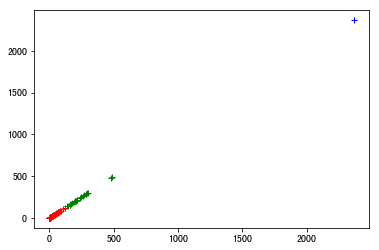

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.mllib.clustering import KMeans

data = 2*np.random.random((30, 2))
print(type(data[0]))
data[10:20,:] = data[10:20,:]+4
data[20:,:] = data[20:,:]+8

data = rangeData

rddData = sc.parallelize( data )
model = KMeans.train( rddData, 4, maxIterations=100, initializationMode="kmeans||",
                    seed=50, initializationSteps=5, epsilon=1e-4)

result = np.zeros((data.shape[0], ))
for ii in range( data.shape[0] ):
    result[ii] = model.predict( data[ii,:] )
colors = ["r+", "b+", "g+"]
for ii in range(3):
    plt.plot( data[result == ii, 0], data[result == ii, 1], colors[ii] )

plt.show()

In [49]:
rangePriceList1 = sorted(rangePriceList,reverse=True)
rangePriceList1.pop(0)
rangePriceList1.pop(0)
rangePriceList1.pop(0)
rangePriceList1.pop(0)
print(rangePriceList1)

rangeData = list(zip(rangePriceList1,rangePriceList1))
rangeData = np.array(rangeData)
# print(rangeData)

[296.0, 293.0, 285.0, 282.0, 269.0, 261.0, 248.0, 239.0, 215.0, 213.0, 205.0, 203.0, 200.0, 200.0, 191.0, 174.0, 166.0, 161.0, 160.0, 159.0, 143.0, 140.0, 119.0, 108.0, 88.0, 82.0, 81.0, 76.0, 76.0, 69.0, 67.0, 64.0, 62.0, 61.0, 55.0, 48.0, 48.0, 45.0, 40.0, 37.0, 35.0, 31.0, 31.0, 28.0, 26.0, 26.0, 25.0, 25.0, 23.0, 23.0, 21.0, 21.0, 19.0, 19.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

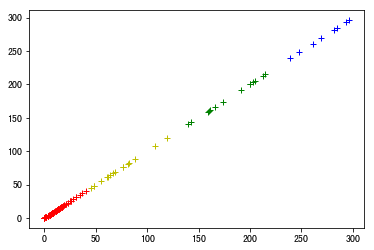

In [51]:
data = rangeData

rddData = sc.parallelize( data )
model = KMeans.train( rddData, 4, maxIterations=100, initializationMode="kmeans||",
                    seed=50, initializationSteps=5, epsilon=1e-4)

result = np.zeros((data.shape[0], ))
for ii in range( data.shape[0] ):
    result[ii] = model.predict( data[ii,:] )
colors = ["r+", "b+", "g+", "y+"]
for ii in range(4):
    plt.plot( data[result == ii, 0], data[result == ii, 1], colors[ii] )

plt.show()